In [1]:
import numpy as np
from qiskit import __version__, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from qiskit.quantum_info import Statevector, Operator
from math import pi
from numpy import sqrt
import random

In [2]:
__version__

'2.3.0'

In [3]:
import sys
!{sys.executable} -m pip list | grep qiskit


qiskit                    2.3.0
qiskit-aer                0.17.2
qiskit-ibm-runtime        0.45.1

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
 
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])
 
print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [5]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [6]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [7]:
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [9]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [10]:
display(u.is_valid())
display(w.is_valid())

True

False

In [11]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [12]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

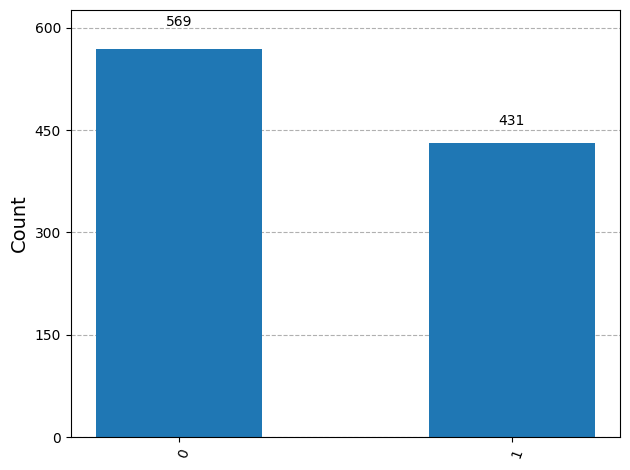

In [13]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [14]:
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [15]:
v = Statevector([1, 0])
 
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
 
display(v.draw("latex"))

<IPython.core.display.Latex object>

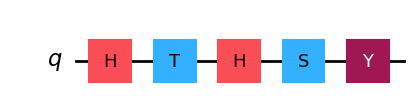

In [16]:
circuit = QuantumCircuit(1)
 
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
 
display(circuit.draw(output="mpl"))

In [17]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

In [18]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

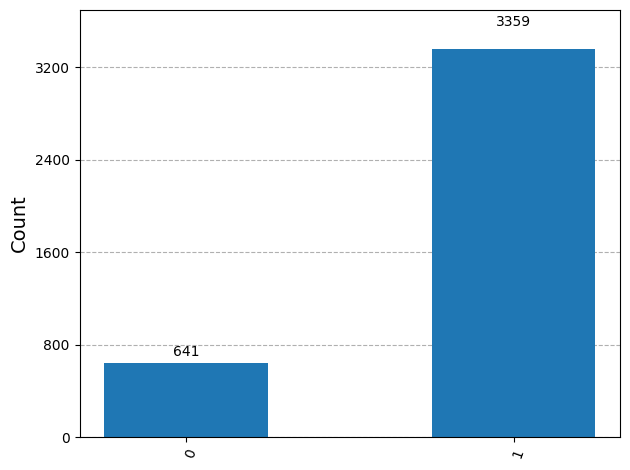

In [19]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

In [20]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)
display(psi.draw("latex"))

<IPython.core.display.Latex object>

In [21]:
plus = Statevector.from_label("+")
minus_i = Statevector.from_label("l")
phi = plus.tensor(minus_i)
display(phi.draw("latex"))

<IPython.core.display.Latex object>

In [22]:
display((plus ^ minus_i).draw("latex"))

<IPython.core.display.Latex object>

In [23]:
H = Operator.from_label("H")
Id = Operator.from_label("I")
X = Operator.from_label("X")
display(H.tensor(Id).draw("latex"))
display(H.tensor(Id).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [24]:
display((H ^ Id ^ X).draw("latex"))

<IPython.core.display.Latex object>

In [25]:
display(phi.evolve(H ^ Id).draw("latex"))

<IPython.core.display.Latex object>

In [26]:
CX = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
psi = plus.tensor(zero)
display(psi.evolve(CX).draw("latex"))

<IPython.core.display.Latex object>

In [27]:
w = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
display(w.draw("latex"))
 
result, state = w.measure([0])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))
 
result, state = w.measure([0, 1])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

Measured: 01
State after measurement:


<IPython.core.display.Latex object>

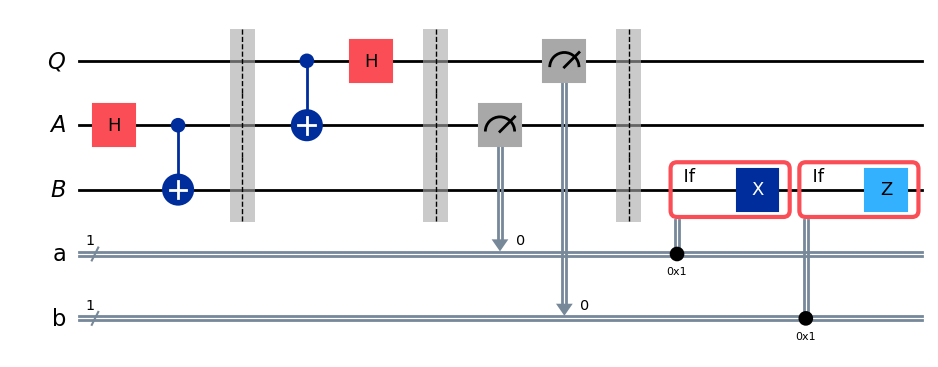

In [28]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")
 
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)
 
# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()
 
# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()
 
# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()
 
# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)
 
display(protocol.draw(output="mpl"))

In [29]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)
 
display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

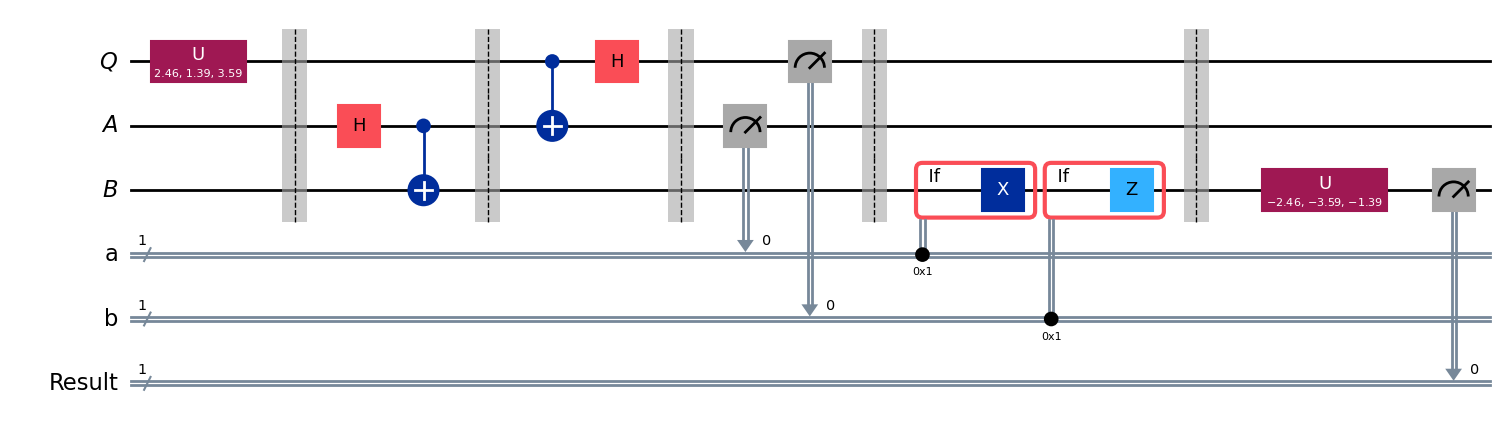

In [30]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.
 
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)
 
# Start with the randomly selected gate on Q
 
test.append(random_gate, qubit)
test.barrier()
 
# Append the entire teleportation protocol from above.
 
test = test.compose(protocol)
test.barrier()
 
# Finally, apply the inverse of the random unitary to B and measure.
 
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)
 
display(test.draw(output="mpl"))

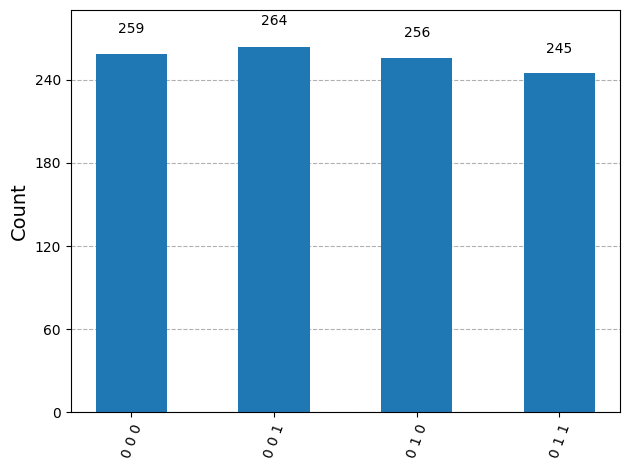

In [31]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

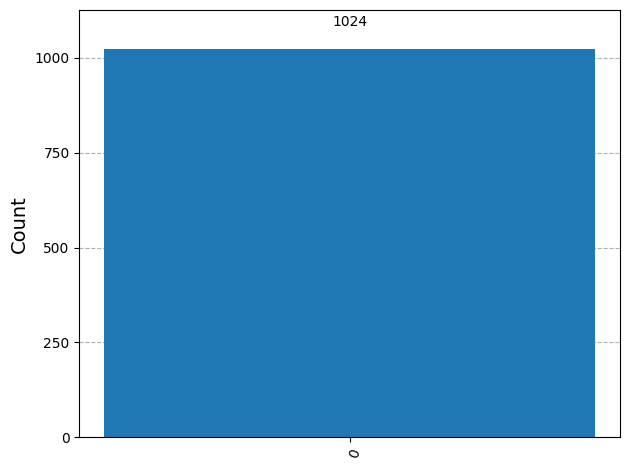

In [32]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

In [33]:
c = "1"
d = "0"

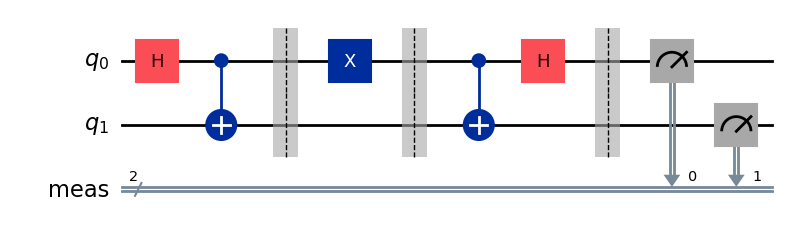

In [34]:
protocol = QuantumCircuit(2)
 
# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()
 
# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()
 
# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()
 
display(protocol.draw(output="mpl"))

Measured 10 with frequency 1024


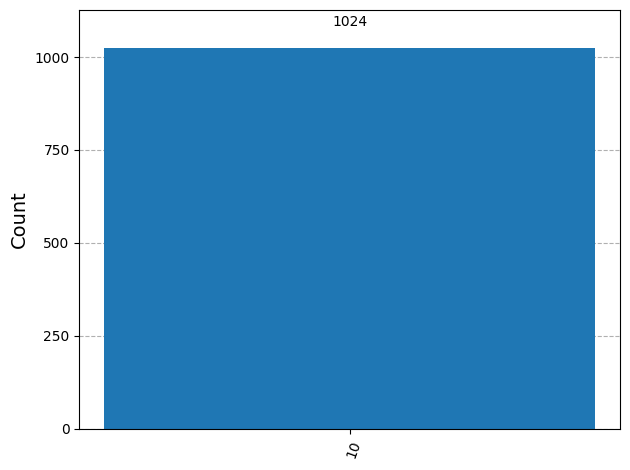

In [35]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
 
for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")
 
display(plot_histogram(statistics))

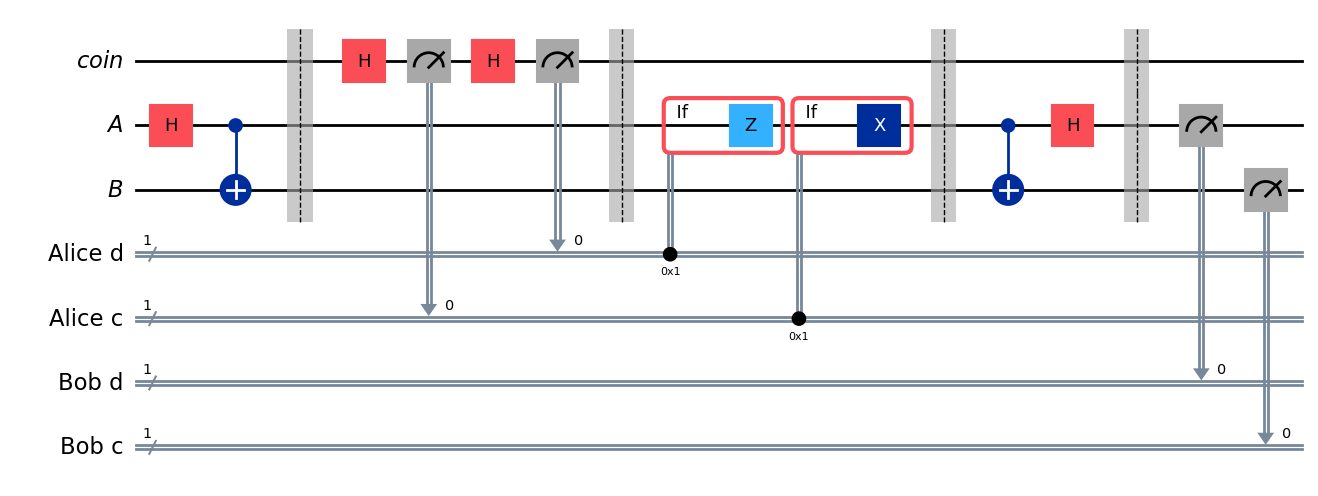

In [36]:
rbg = QuantumRegister(1, "coin")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
 
Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")
 
test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)
 
# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()
 
# Use the 'coin' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()
 
# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()
 
# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()
 
Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)
 
display(test.draw(output="mpl"))

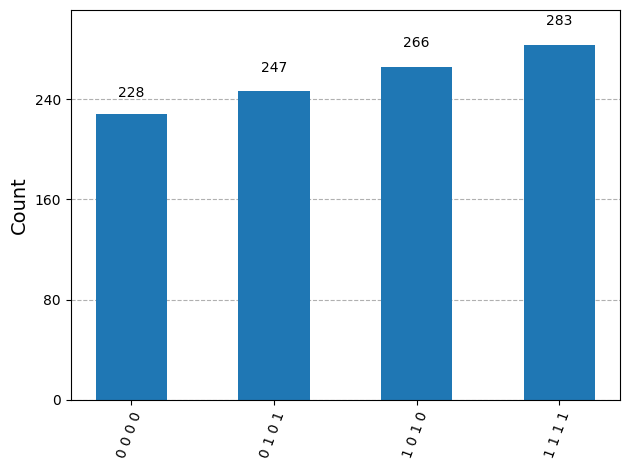

In [37]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [38]:
def chsh_game(strategy):
    # This function runs the CHSH game, using the strategy (a function
    # from two bits to two bits), returning 1 for a win and 0 for a loss.
 
    # Choose x and y randomly
    x, y = random.randint(0, 1), random.randint(0, 1)
 
    # Use the strategy to determine a and b
    a, b = strategy(x, y)
 
    # Decide if the strategy wins or loses
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [39]:
def chsh_circuit(x, y):
    # This function creates a `QuantumCircuit` implementing the quantum
    # strategy described above (including the e-bit preparation).
 
    qc = QuantumCircuit(2, 2)
 
    # Prepare an e-bit
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()
 
    # Alice's actions
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)
 
    # Bob's actions
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)
 
    return qc

(x,y) = (0,0)


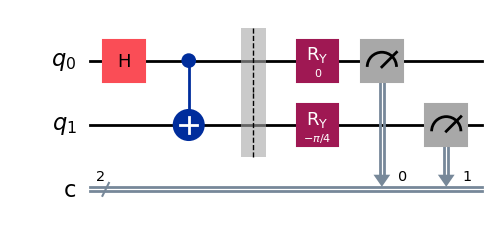

(x,y) = (0,1)


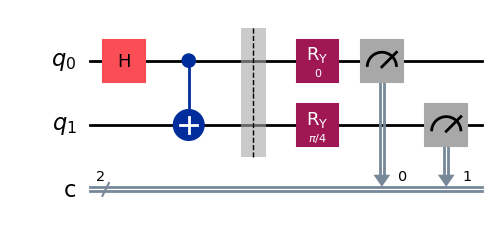

(x,y) = (1,0)


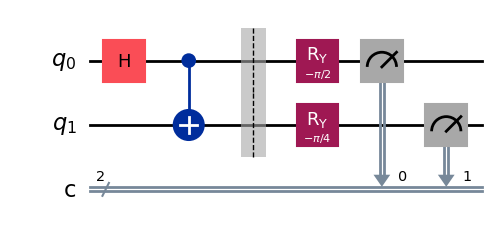

(x,y) = (1,1)


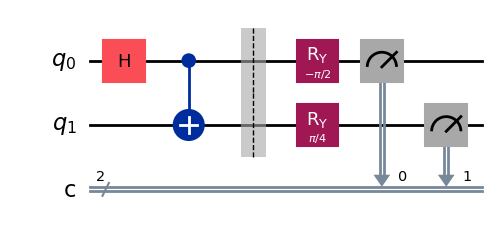

In [40]:
# Draw the four possible circuits
 
print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output="mpl"))
 
print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output="mpl"))
 
print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output="mpl"))
 
print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

In [41]:
def quantum_strategy(x, y):
    # This function runs the appropriate quantum circuit defined above
    # one time and returns the measurement results
 
    # Setting `shots=1` to run the circuit once
    result = AerSimulator().run(chsh_circuit(x, y), shots=1).result()
    statistics = result.get_counts()
 
    # Determine the output bits and return them
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [42]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
 
for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)
 
print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.853


In [43]:
def classical_strategy(x, y):
    # This function implements just one example of an optimal classical
    # strategy for the CHSH game. Other classical strategies can be
    # implemented by changing the bit values assigned to a and b.
 
    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1
 
    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0
 
    return a, b

In [44]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
 
for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)
 
print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.736
